# Fuzzy Cognitive Maps - Scenario

Fuzzy Cognitive Maps (FCM) is a method, that allows to use domain knowledge of experts and explore different outcomes or behaviour based on hypothetical scenarios. With the gained knowledge of running different scenarios, potential pitfalls or unwanted effects can be detected, before actions are deployed to the real world.

For this notebook the python package `fcmpy` is used.

## Simulation
Let us consider a simple example to illustrate the simulation option with FCMs.

* Graph nodes denote concepts or variables that describe the problem
* Graph edges represent (casual) relationships between concepts, which are characterized by positive or negative weights
* Weights can take values in the `[-1, 1]` interval so that they represent both the direction and the intensity of causal relationshipts

We define the causal relationships manually according to the rules that govern the simplified food chain. For example, predators thrive in the area when ther is a lot of prey. And grass, which serves as food source for predator, has a positive effect on them.

![FCM Visualization](image/FCM_Vis.png)

Here we load the necessary packages and functions

In [1]:
from fcmpy import FcmSimulator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The shown edges in the images, are stored as a `weight_matrix`.

In [2]:
weight_matrix = pd.DataFrame(np.array([[0, 1, -1],[-1,0,0], [1,0,0]]),
                             columns=['Prey', 'Predator', 'Grass'])
weight_matrix

,Prey,Predator,Grass
0,0,1,-1
1,-1,0,0
2,1,0,0


In our example we want simulate what happens **if**:
* we have **medium** number of predators, which will be represented as **0.5**
* we have a **moderate** number of grass, which will be represented as **0.75**

In [3]:
init_state = {'Predator': 0.5,'Prey': 0.5,"Grass": 0.75}

Initalise the simulation function `FcmSimulator` from `fcmpy`.

In [4]:
sim = FcmSimulator()

### Different Activation functions

**Sigmoid** <br>
In our first scenario the simulation is done with the `sigmoid` activation function. The values converge after 9 iterations, which indicates a stable pattern (equilibrium).

**TanH** <br>
In the second scenario the simulation is done with the `tanh` activation function. Here cyclic behaviour can be seen, which does not converge. In our example it is a repeating pattern.

In [5]:
res_sigmoid = sim.simulate(initial_state=init_state, weight_matrix=weight_matrix, transfer='sigmoid', inference='mKosko', thresh=0.001, iterations=50, l=1)

The values converged in the 9 state (e <= 0.001)


In [6]:
res_hyperbolic = sim.simulate(initial_state=init_state, weight_matrix=weight_matrix, transfer='tanh',
                           inference='mKosko', thresh=0.001, iterations=50, l=1)

/home/larshubacher/anaconda3/envs/fcm_test/lib/python3.8/site-packages/fcmpy/simulator/simulator.py:171: UserWarning: The values didn't converge. More iterations are required!
  warnings.warn("The values didn't converge. More iterations are required!")


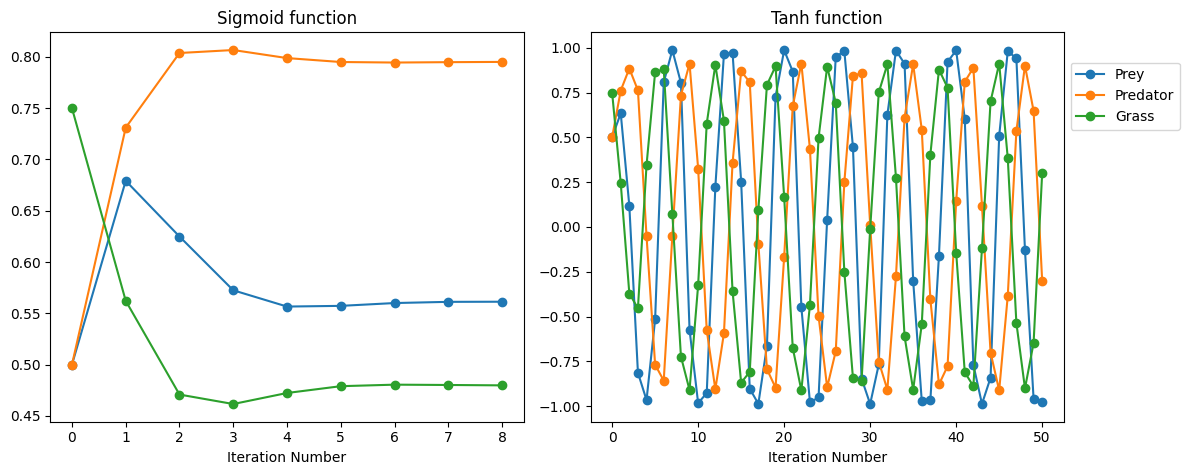

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Two plots side-by-side

res_sigmoid.plot(ax=axes[0], marker='o')
axes[0].get_legend().remove()
axes[0].set_xlabel("Iteration Number")
axes[0].set_title("Sigmoid function")  # Individual title for left plot

res_hyperbolic.plot(ax=axes[1], marker='o')
axes[1].legend(bbox_to_anchor=(1, 0.94))
axes[1].set_xlabel("Iteration Number")
axes[1].set_title("Tanh function")  # Individual title for right plot

#fig.text(0.5, 0.02, "Different Components for the Same Models", ha="center", fontsize=12)

# Step 4: Adjust layout for spacing
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Leave space for the shared x-label

# Step 5: Show the plots
plt.show()


## Intervention

After getting a feeling for the simulation of a scenario. Here we take a look at possible interventions

In [8]:
from fcmpy import FcmIntervention

In [9]:
inter = FcmIntervention(FcmSimulator)

In [10]:
inter.initialize(initial_state=init_state, weight_matrix=weight_matrix,transfer="tanh", inference="mKosko",thresh=0.001, iterations=50, l=1)

/home/larshubacher/anaconda3/envs/fcm_test/lib/python3.8/site-packages/fcmpy/simulator/simulator.py:171: UserWarning: The values didn't converge. More iterations are required!
  warnings.warn("The values didn't converge. More iterations are required!")


In [11]:
inter.test_results["baseline"]

,Prey,Predator,Grass
0,0.500000,0.500000,0.750000
1,0.635149,0.761594,0.244919
2,0.117922,0.884646,-0.371559
3,-0.813835,0.762670,-0.453804
4,-0.966108,-0.051120,0.345241
5,-0.515173,-0.768735,0.864616
6,0.806934,-0.857523,0.880904
7,0.987768,-0.050546,0.073835
8,0.804821,0.733944,-0.723014
9,-0.573107,0.911912,-0.910053


Here we add an interventen, where hunters are allowed to remove some predators per season. This is why kind of intervention is remarked `continuous`. 

In [12]:
inter.add_intervention("Intervention_Hunters", type="continuous", impact={"Predator":-0.3}, effectiveness=1)

In [13]:
inter.test_intervention("Intervention_Hunters", iterations=50)

/home/larshubacher/anaconda3/envs/fcm_test/lib/python3.8/site-packages/fcmpy/simulator/simulator.py:171: UserWarning: The values didn't converge. More iterations are required!
  warnings.warn("The values didn't converge. More iterations are required!")


In [14]:
intervention_hunter = inter.test_results["Intervention_Hunters"][["Prey", "Predator", "Grass"]]

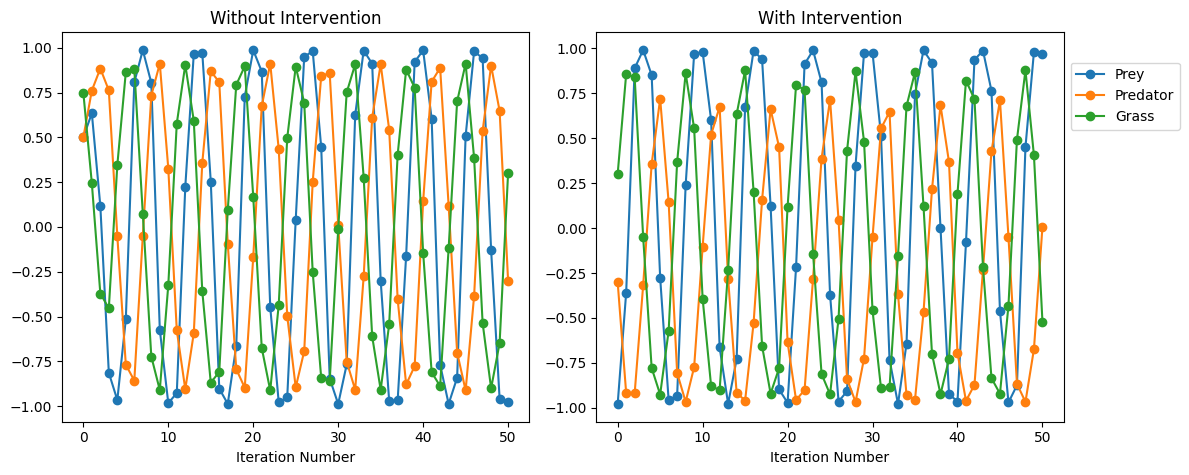

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Two plots side-by-side

res_hyperbolic.plot(ax=axes[0], marker='o')
axes[0].get_legend().remove()
axes[0].set_xlabel("Iteration Number")
axes[0].set_title("Without Intervention")  # Individual title for left plot

intervention_hunter.plot(ax=axes[1], marker='o')
axes[1].legend(bbox_to_anchor=(1, 0.94))
axes[1].set_xlabel("Iteration Number")
axes[1].set_title("With Intervention")  # Individual title for right plot

#fig.text(0.5, 0.02, "Different Components for the Same Models", ha="center", fontsize=12)

# Step 4: Adjust layout for spacing
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Leave space for the shared x-label

# Step 5: Show the plots
plt.show()
